In [1]:
%matplotlib inline
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

plt.style.use('ggplot')

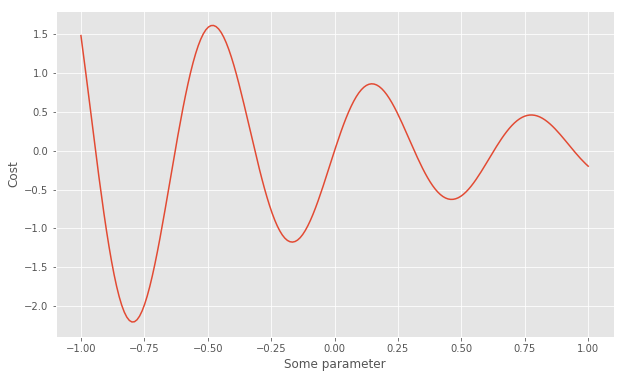

In [2]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1 , 200)
hz =10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some parameter')

In [3]:
gradient = np.diff(cost)

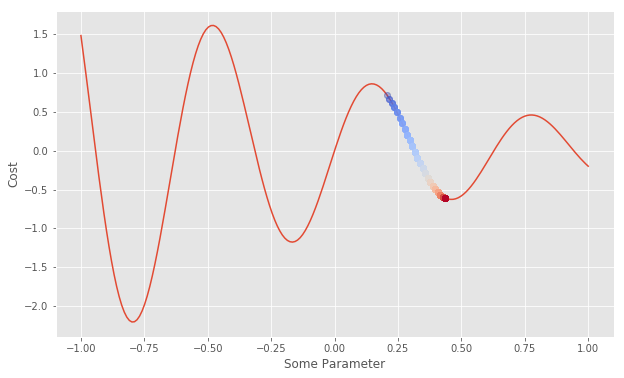

In [4]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x) * np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p =120 #np.radom.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    init_p -= learning_rate *gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)],'ro',alpha=(iter_i+1)/n_iterations, color=scalar_map.to_rgba(iter_i))

In [5]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

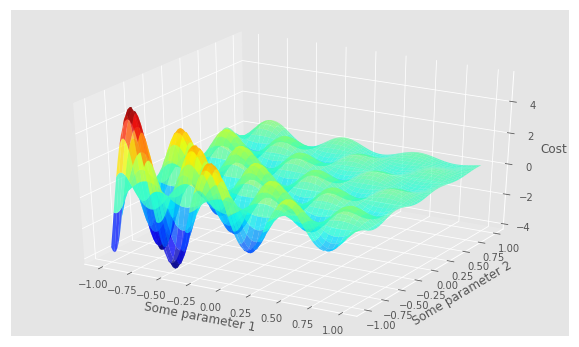

In [6]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some parameter 1')
ax.set_ylabel('Some parameter 2')
ax.set_zlabel('Cost')

In [7]:
np.mgrid[0:2,0:3]

array([[[0, 0, 0],
        [1, 1, 1]],

       [[0, 1, 2],
        [0, 1, 2]]])

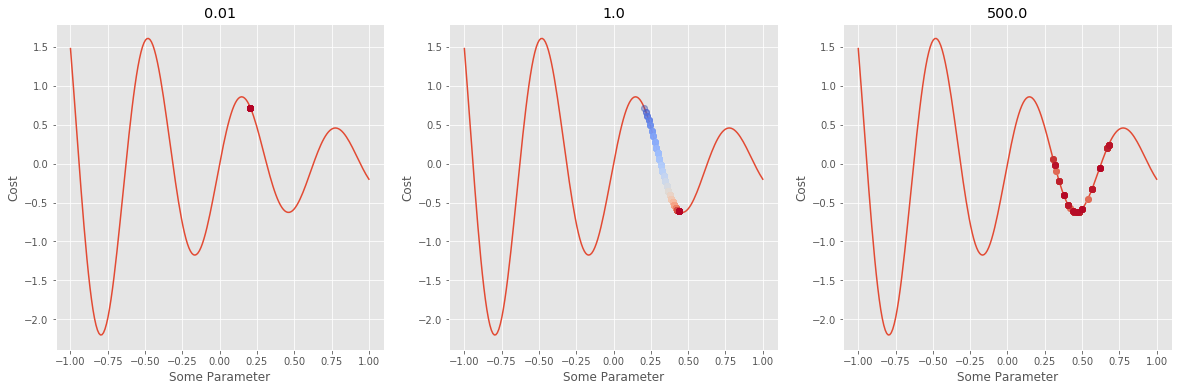

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.]):
    ax = axs[rate_i]
    x = np.linspace(-1,1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha = (iter_i+1)/ n_iterations, color = scalar_map.to_rgba(iter_i))

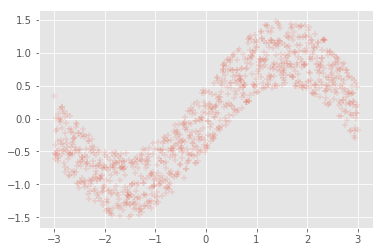

In [9]:
n_observations = 1000

xs = np.linspace(-3, 3, n_observations)

ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

In [10]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

(array([   3.,    9.,   60.,  140.,  239.,  239.,  185.,   89.,   27.,    9.]),
 array([-3.38698769, -2.72917805, -2.07136841, -1.41355877, -0.75574913,
        -0.09793949,  0.55987015,  1.21767979,  1.87548943,  2.53329906,
         3.1911087 ]),
 <a list of 10 Patch objects>)

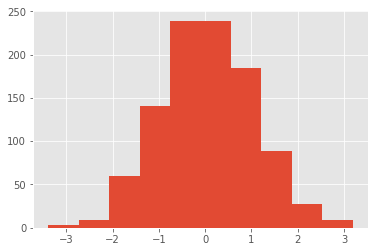

In [11]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000],mean = 0, stddev=1.0, dtype=tf.float32).eval()
plt.hist(n)

(array([   4.,    4.,   50.,  120.,  192.,  276.,  187.,  113.,   43.,   11.]),
 array([-0.34870559, -0.28491174, -0.2211179 , -0.15732405, -0.0935302 ,
        -0.02973635,  0.03405749,  0.09785134,  0.16164519,  0.22543903,
         0.28923288]),
 <a list of 10 Patch objects>)

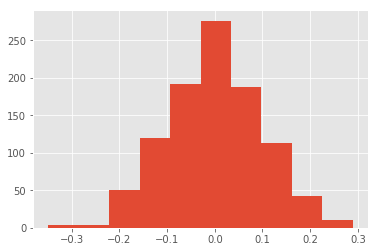

In [12]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [28]:
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1, name='weight'))
B = tf.Variable(tf.constant([0],dtype=tf.float32), name='bias')

Y_pred = X*W + B

In [29]:
def distance(p1, p2):
    return tf.abs(p1-p2)

In [30]:
cost = tf.reduce_mean(distance(Y_pred, Y))

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0.60133
0.485238
0.43582
0.416059
0.407818
0.404325
0.402839
0.401988
0.401489
0.401244
0.401145
0.401095
0.401081
0.401077
0.401073
0.401069
0.401065
0.401061
0.401057


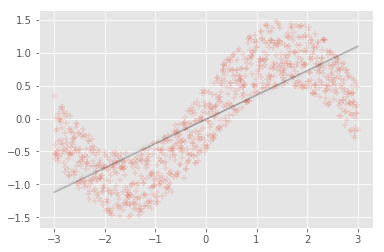

In [35]:
# We create a session to use the graph
n_iterations = 5000

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Herexx we tell tensorflow thaXt we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.00000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

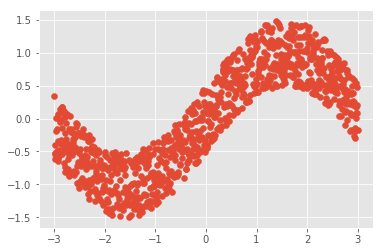

In [33]:
plt.scatter(xs, ys)

In [39]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


In [41]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs)//batch_size
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size] )

[84 10 18 53 52 91 93 89 34 33]
[ 7 36 73 51 64 65 98 99 80 88]
[75 46 16 40 61 79 96 14 27 48]
[66 54 82 47 32 49 22 31 68 90]
[11 86  2 30 13 20 55 12 17 59]
[25 23  9 62 97 92  8 94 28 76]
[50 63 83  0 71 39 81  6 43 45]
[87 67 78  5 77 38 24 58 60 21]
[41  4 26 57 74 19  1 56 69 37]
[35 70 42 72 29 95 85  3 15 44]


Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.584232
0.476533
0.432739
0.4148
0.407272
0.404091
0.402729
0.401923
0.401449
0.401227
0.401136
0.401091
0.401081
0.401077
0.401072
0.401068
0.401064
0.401061
0.401057
0.401055
0.401056
0.401056
0.401055
0.401055
0.401056
0.401055
0.401056
0.401056
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401055
0.401056
0.401055


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


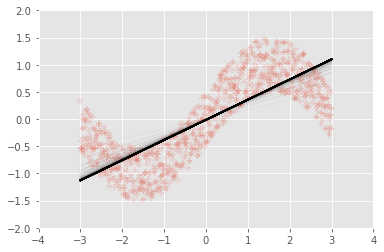

In [49]:
n_iterations = 500
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha =0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    
    prev_training_cost = 0.
    
    for it_i in range(n_iterations):
        rand_idxs = np.random.permutation(range(len(xs)))
        n_batches = len(rand_idxs) // batch_size
        for batch_i in range(n_batches):
            
            rand_idx = rand_idxs[batch_i*batch_size : (batch_i+1)*batch_size]
            batch_x = xs[rand_idx]
            batch_y = ys[rand_idx]
            sess.run(optimizer, feed_dict={X:batch_x, Y: batch_y})
            

        if it_i %10 == 0:
            
            ys_pred = Y_pred.eval(feed_dict={X:xs },session=sess)
            training_cost = sess.run(cost, feed_dict={X:xs,Y:ys})
            
            ax.plot(xs, ys_pred, 'k', alpha=it_i/n_iterations)
            print(training_cost)
fig.show()
plt.draw()

In [81]:
from tensorflow.python.framework import ops
ops.reset_default_graph()

In [102]:
from matplotlib.colors import color
import matplotlib.cm as cmx

ImportError: cannot import name 'color'

In [111]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax =plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    
    with tf.Session() as sess:
        
        sess.run(tf.global_variables_initializer())
        prev_trainig_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs)// batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
                
            if it_i%10 : 
                ys_pred = Y_pred.eval(feed_dict={X:xs},session = sess)
                training_cost = sess.run(cost, feed_dict={X:xs, Y:ys})
                
                ax.plot(xs,ys_pred, alpha=it_i/n_iterations, color=scalar_map.to_rgba(it_i))
                print(training_cost)
        fig.show()
        plt.draw()

In [112]:
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

b= tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

h = tf.matmul(tf.expand_dims(X,1),W) + b
Y_pred = tf.reduce_sum(h, 1)

cost = tf.reduce_mean(distance(Y_pred, Y))

0.401941
0.402526
0.401246
0.401438
0.401271
0.40363
0.401213
0.401373
0.402216
0.401319
0.402167
0.403925
0.40195
0.401821
0.403206
0.401379
0.401421
0.401457
0.402579
0.403015
0.402357
0.40499
0.402111
0.401139
0.402776
0.40197
0.40149
0.401194
0.404387
0.403168
0.401564
0.401502
0.402901
0.40344
0.401758
0.402784
0.401543
0.401631
0.401534
0.401322
0.401425
0.403244
0.40116
0.402289
0.401226
0.401383
0.401071
0.402438
0.401372
0.401655
0.401114
0.401628
0.401238
0.40142
0.404153
0.401305
0.401255
0.401542
0.401599
0.401918
0.401774
0.401056
0.4024
0.401376
0.401171
0.403061
0.401068
0.401096
0.402523
0.401211
0.401519
0.402572
0.402344
0.401113
0.401931
0.401746
0.401476
0.402326
0.401069
0.401082
0.403003
0.403477
0.401693
0.40128
0.401131
0.40145
0.401242
0.401314
0.402159
0.40607
0.401404
0.401135
0.402975
0.401276
0.401287
0.401134
0.401344
0.401373
0.411397
0.401716
0.404153
0.40125
0.40123
0.401097
0.402099
0.401173
0.402322
0.401312
0.401063
0.401091
0.402776
0.40456
0.401657

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


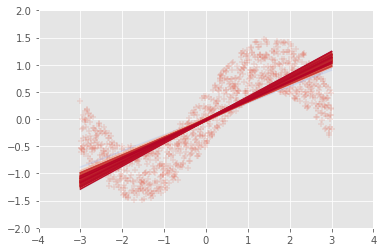

In [113]:
train(X,Y,Y_pred,n_iterations=500,learning_rate=0.002)

0.677131
0.584975
0.605193
0.577443
0.572845
0.575767
0.580326
0.574255
0.560763
0.584392
0.562677
0.547343
0.561653
0.546472
0.537519
0.537781
0.551914
0.533506
0.521848
0.52736
0.523584
0.514167
0.510468
0.507665
0.509328
0.507695
0.514643
0.492048
0.516325
0.511171
0.484819
0.590042
0.501199
0.523545
0.49145
0.515411
0.489172
0.509591
0.460193
0.481439
0.455819
0.474405
0.478694
0.446716
0.462553
0.459166
0.437568
0.451317
0.426994
0.424915
0.477589
0.421272
0.51517
0.421358
0.453401
0.431303
0.489777
0.407274
0.407798
0.443221
0.408956
0.441857
0.44734
0.437408
0.388003
0.535806
0.38948
0.390963
0.492882
0.43531
0.47719
0.406321
0.425552
0.389662
0.370794
0.461016
0.491494
0.431122
0.394935
0.360654
0.404657
0.353081
0.41689
0.395137
0.378009
0.353121
0.362848
0.406402
0.457299
0.417712
0.361615
0.410161
0.359089
0.358287
0.350292
0.363817
0.360967
0.392583
0.33257
0.434913
0.383247
0.345652
0.409881
0.368077
0.474409
0.355709
0.399739
0.365525
0.407168
0.368973
0.342224
0.409263
0

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


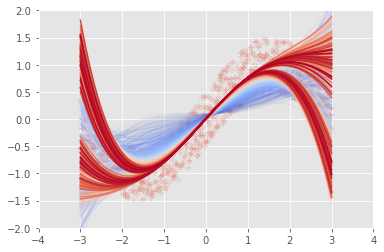

In [114]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 5):
    W = tf.Variable(
            tf.random_normal([1], stddev=0.1), name='weight_%d'%pow_i)
    Y_pred = tf.add(tf.mul(tf.pow(X, pow_i), W), Y_pred)
    
train(X, Y, Y_pred, n_iterations=500, learning_rate=0.002)

polynomial expansion is not useful

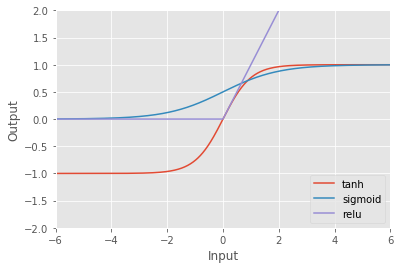

In [117]:
sess = tf.InteractiveSession()
x = np.linspace(-6, 6, 1000)

plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(),label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

0.309111
0.305039
0.302046
0.299284
0.296734
0.294369
0.292313
0.290341
0.288596
0.285567
0.284288
0.283026
0.28208
0.280975
0.280092
0.279414
0.27867
0.278671
0.277119
0.276611
0.276269
0.275972
0.275529
0.275065
0.274751
0.274505
0.274238
0.273645
0.273411
0.27319
0.273012
0.272756
0.272568
0.272509
0.272228
0.272073
0.271687
0.271696
0.271394
0.271181
0.271007
0.27089
0.270674
0.270562
0.27038
0.2702
0.269926
0.269763
0.269619
0.269534
0.269593
0.269206
0.269154
0.268943
0.268873
0.268531
0.268415
0.268352
0.268136
0.268076
0.268047
0.267722
0.267585
0.267364
0.267245
0.267205
0.266974
0.266886
0.266941
0.266621
0.26658
0.266437
0.266258
0.266514
0.265989
0.265902
0.265806
0.266174
0.265545
0.265578
0.265359
0.265128
0.265375
0.264919
0.264861
0.265319
0.264653
0.264572
0.264751
0.264452


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


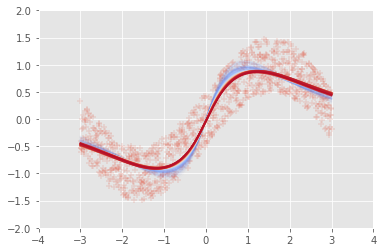

In [119]:
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

h = tf.nn.tanh(tf.matmul(tf.expand_dims(X,1), W) +b , name= 'h')

Y_pred = tf.reduce_sum(h, 1)

train(X, Y, Y_pred)

In [122]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name= 'weight')
    b = tf.Variable(tf.constant(0, dtype=tf.float32, shape = [n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h